In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
train_values = pd.read_csv('../datasets/train_values.csv')

### Porcentaje de la cantidad de edificaciones respecto a cada condición de superficie terrestre

In [4]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie = train_values[['land_surface_condition','building_id']]

In [5]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie = porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie\
 .groupby('land_surface_condition').count().rename(columns={'building_id':'cantidad_de_edificaciones'})

In [6]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie

,cantidad_de_edificaciones
land_surface_condition,
n,35528
o,8316
t,216757


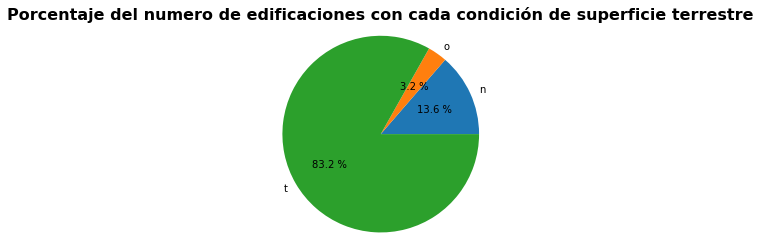

In [7]:
land_surface_condition = ['n','o','t']
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie.reset_index()
plt.title('Porcentaje del numero de edificaciones con cada condición de superficie terrestre', fontsize=16, fontweight='bold')
plt.pie(porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie['cantidad_de_edificaciones'], labels=land_surface_condition,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Podemos observar que el 83.2% de las edificaciones, se encuentran en una condición de superficie terrestre t

### Número de edificaciones con cada grado de daño segun la condición de la superficie terrestre

In [8]:
condicion_superficie_terrestre = train_values[['land_surface_condition','building_id']]

In [9]:
condicion_superficie_terrestre = train_labels.merge(condicion_superficie_terrestre)

In [10]:
condicion_superficie_terrestre = condicion_superficie_terrestre.groupby(['land_surface_condition','damage_grade']).count().\
    rename(columns={'building_id':'cantidad_de_edificaciones'})

In [11]:
condicion_superficie_terrestre

cantidad_de_edificaciones
land_surface_condition damage_grade                           
n                      1                                  2556
                       2                                 21484
                       3                                 11488
o                      1                                   602
                       2                                  4708
                       3                                  3006
t                      1                                 21966
                       2                                122067
                       3                                 72724

In [12]:
condicion_superficie_terrestre = condicion_superficie_terrestre.reset_index().\
 pivot(index='land_surface_condition', columns='damage_grade', values='cantidad_de_edificaciones')

In [13]:
condicion_superficie_terrestre

damage_grade,1,2,3
land_surface_condition,,,
n,2556,21484,11488
o,602,4708,3006
t,21966,122067,72724


Text(0, 0.5, 'Cantidad de edificaciones')

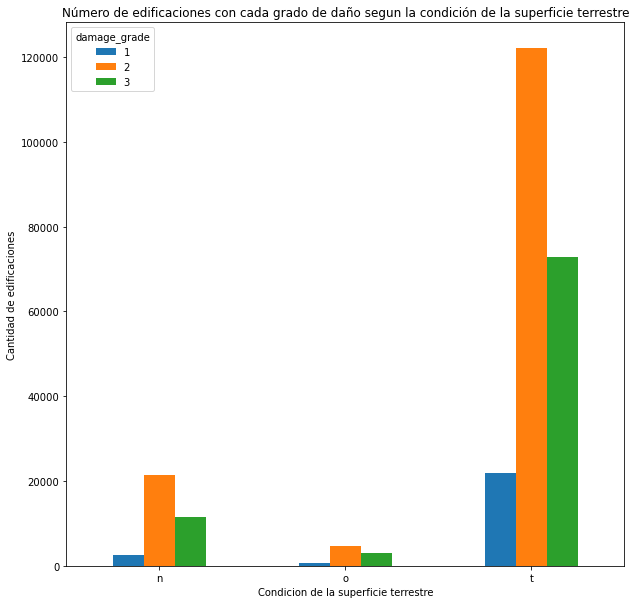

In [14]:
condicion_superficie_terrestre.plot(kind='bar',figsize=(10,10),\
        rot=0,title='Número de edificaciones con cada grado de daño segun la condición de la superficie terrestre')
ax=plt.gca()
ax.set_xlabel('Condicion de la superficie terrestre')
ax.set_ylabel('Cantidad de edificaciones')